In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, class_likelihood_ratios, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 
import matplotlib.patches as mpatches
import pickle

In [2]:
df_data = pd.read_csv("adult.csv")

In [3]:
df_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df_data["native-country"].value_counts().index[0]

' United-States'

In [6]:
df_data["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [7]:
df_data = df_data.drop(['fnlwgt', 'educational-num'], axis=1)

In [8]:
col_names = df_data.columns

Check Nulls and replace values

In [9]:
for c in col_names:
    df_data = df_data.replace("?", np.NaN)
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

Encoding

In [10]:
category_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Encoder = preprocessing.LabelEncoder()
mapping_dict = {}

for col in category_col:
    df_data[col] = Encoder.fit_transform(df_data[col])
    
    le_name_mapping = dict(zip(Encoder.classes_, Encoder.transform(Encoder.classes_)))
    
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'workclass': {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}, 'education': {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, ' Transport-moving': 14}, 'relationship': {' Husband': 0, ' Not-in-family': 1, ' 

Exploratory Data Analysis

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

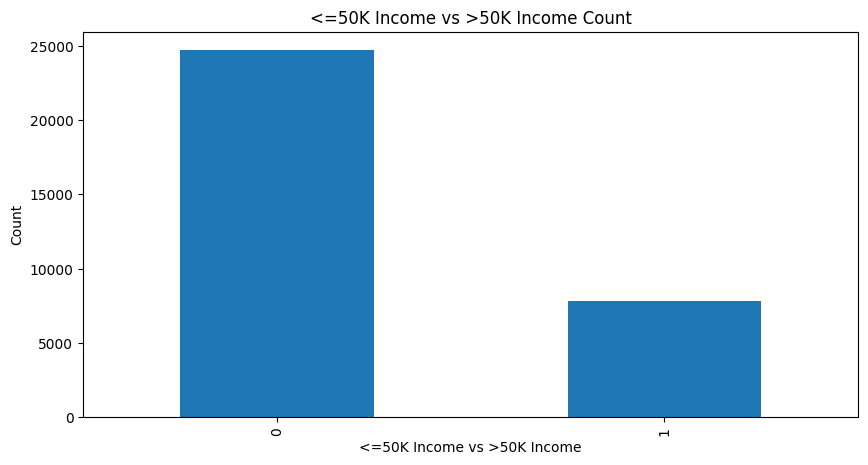

In [11]:
plt.figure(figsize=(10, 5))
ax = df_data.income.value_counts().plot(kind='bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

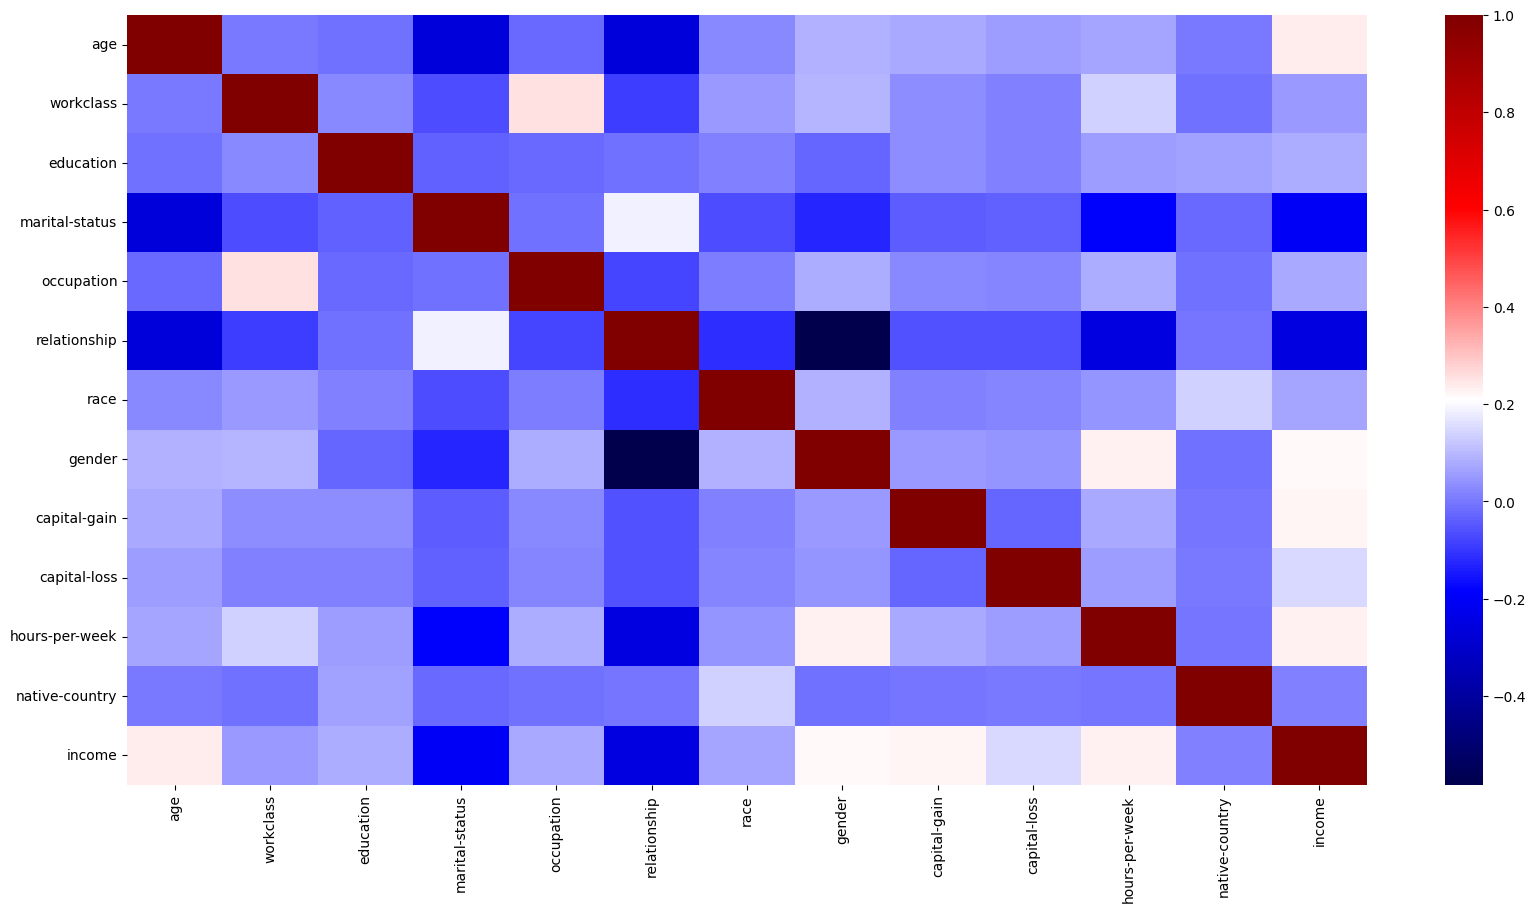

In [12]:
# Heat map to find any high correlations
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

Label Data

In [13]:
X = df_data.drop('income', axis=1)
Y = df_data['income']

Cluster Data using Dimensionality reduction

In [14]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

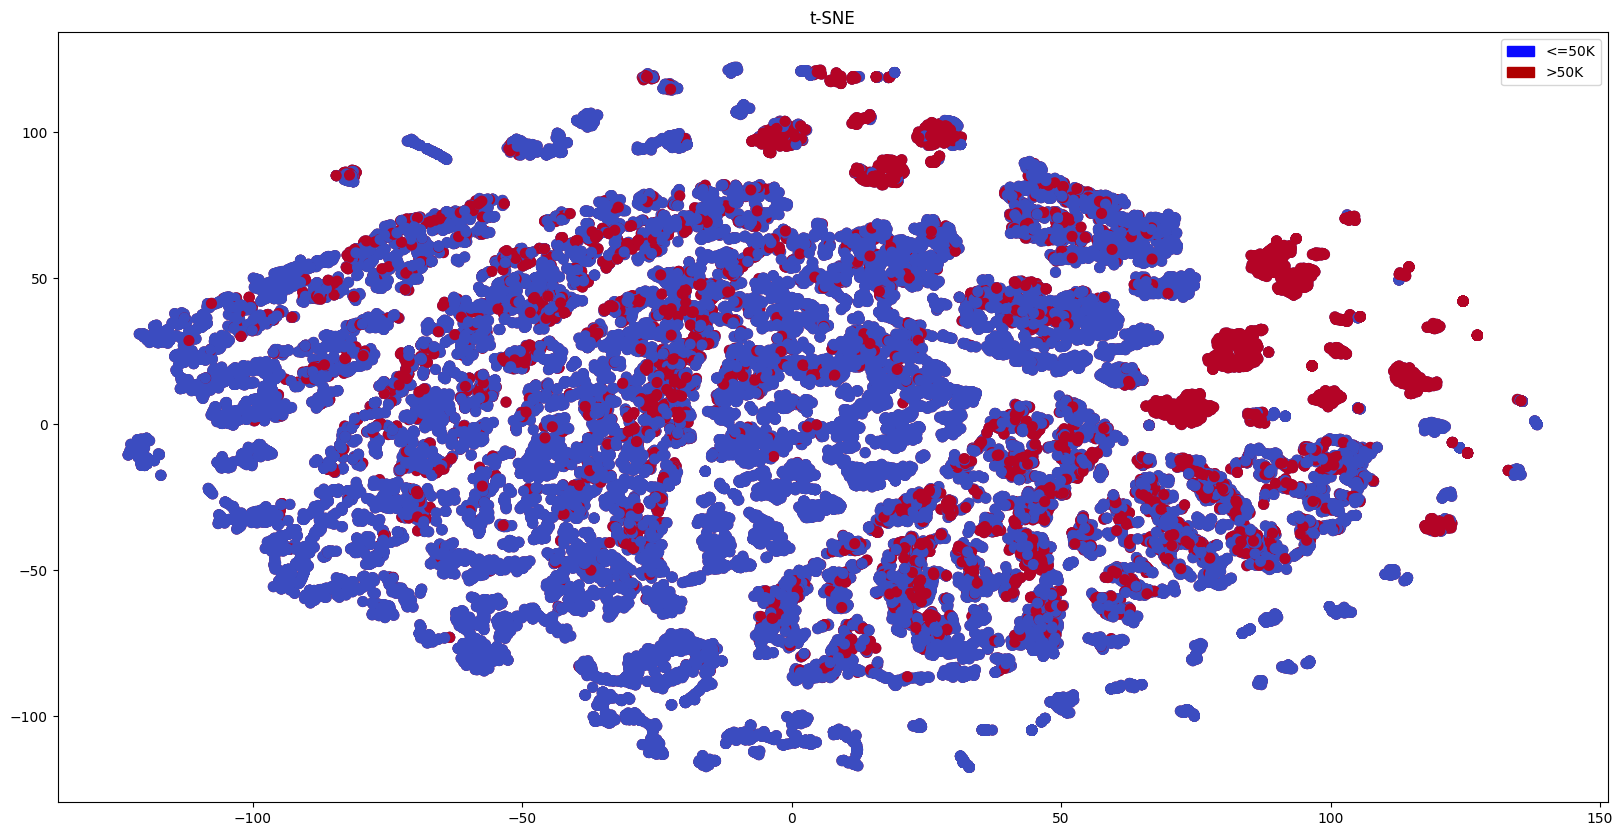

In [17]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label = '>50K')
plt.figure(figsize=(20, 10))
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=(Y==0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=(Y==1), cmap='coolwarm', label='<=50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

Split into train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)


Train & Test Data using Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score: ", accuracy_score(y_test, ypred))
print("Recall Score: ", recall_score(y_test, ypred))
print("Precision Score: ", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold: ", rf_threshold)

[[6866  562]
 [ 890 1451]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7428
           1       0.72      0.62      0.67      2341

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Accuracy Score:  0.8513665677141979
Recall Score:  0.6198205894916702
Precision Score:  0.7208147044212618
ROC AUC Score:  0.7720804616817534
Threshold:  [2 1 0]


Train & Test Data Using Gradient Boosting Classifier

In [22]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score: ", accuracy_score(y_test, ypred))
print("Recall Score: ", recall_score(y_test, ypred))
print("Precision Score: ", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold: ", gbc_threshold)

[[7035  393]
 [ 905 1436]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7428
           1       0.79      0.61      0.69      2341

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Accuracy Score:  0.8671307196232982
Recall Score:  0.6134130713370355
Precision Score:  0.7851284855112083
ROC AUC Score:  0.7802525776717487
Threshold:  [2 1 0]


Train & Test Data using Ada Boost Classifier

In [23]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score: ", accuracy_score(y_test, ypred))
print("Recall Score: ", recall_score(y_test, ypred))
print("Precision Score: ", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold: ", abc_threshold)

[[6980  448]
 [ 884 1457]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7428
           1       0.76      0.62      0.69      2341

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

Accuracy Score:  0.8636503224485618
Recall Score:  0.6223835967535242
Precision Score:  0.7648293963254593
ROC AUC Score:  0.7810356325178498
Threshold:  [2 1 0]


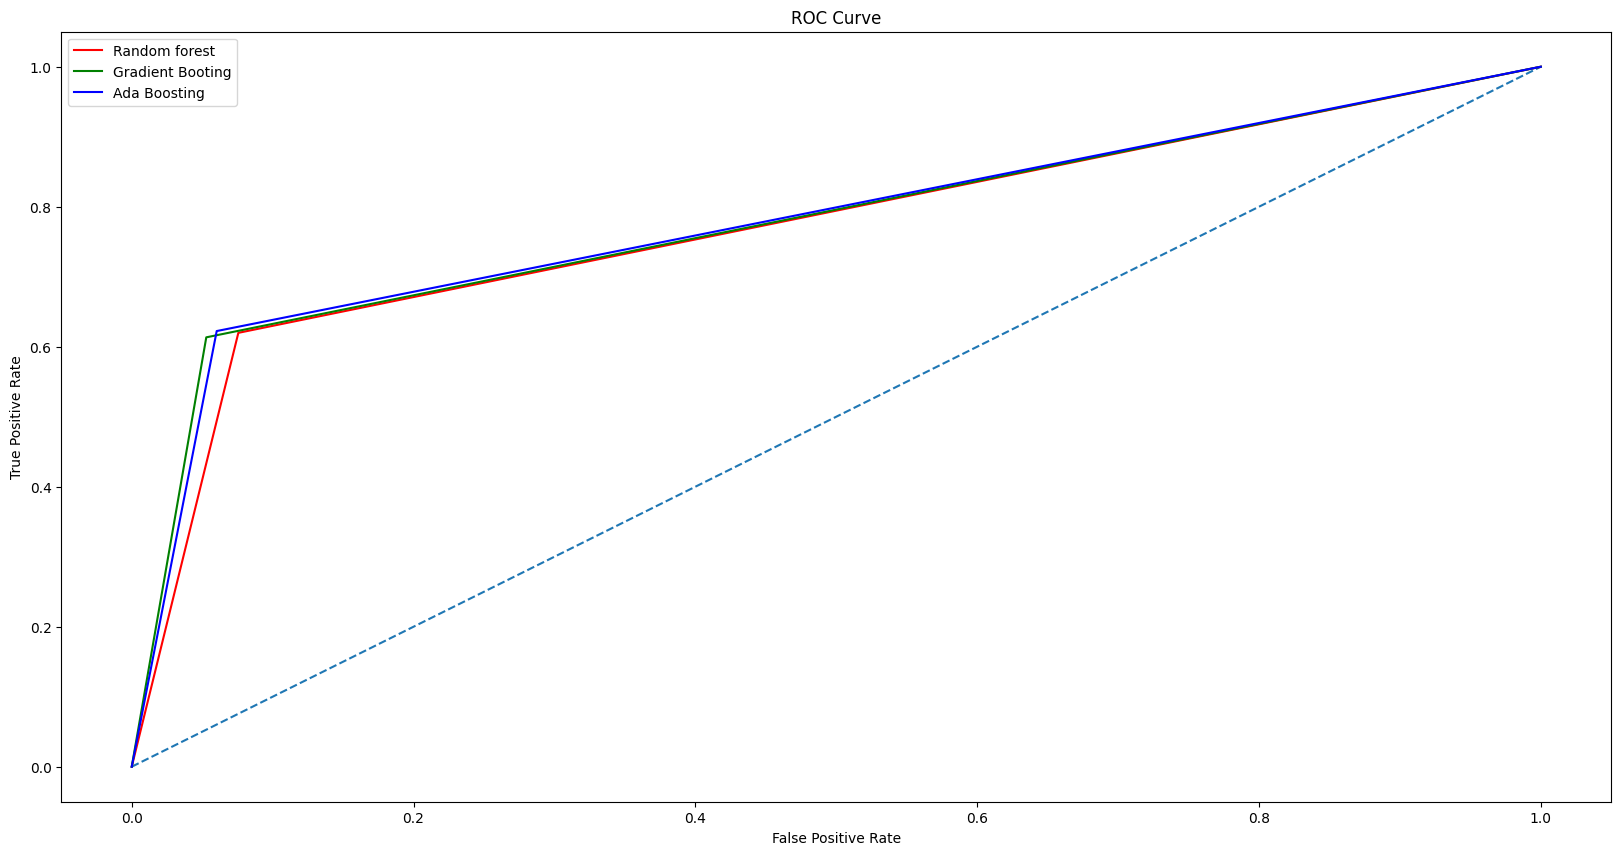

In [24]:
# ROC Curve
plt.figure(figsize=(20, 10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_fp, rf_tp, color="red", label="Random forest")
plt.plot(gbc_fp, gbc_tp, color="green", label="Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label="Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [25]:
# Get most important features and their contribution in model
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df['Importance'] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

KeyError: 'Importance'